<h3>Import Library<h3>

In [ ]:
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt

from scipy import stats
from scipy.stats import norm,skew

from sklearn.preprocessing import RobustScaler,StandardScaler
from sklearn.linear_model import LinearRegression,Ridge,Lasso,ElasticNet
from sklearn.model_selection import train_test_split,GridSearchCV
from sklearn.metrics import mean_squared_error
from sklearn.base import BaseEstimator,TransformerMixin,RegressorMixin,clone

import xgboost as xgb

import warnings 
warnings.filterwarnings('ignore')

In [71]:
column_name=["MPG","Cylinders","Displacement","Horsepower","Weight","Accelaration","Model Year","Origin"]
data=pd.read_csv("auto-mpg.data",names=column_name,na_values="?",comment ="\t",sep=" ",skipinitialspace=True)

In [72]:
data

,MPG,Cylinders,Displacement,Horsepower,Weight,Accelaration,Model Year,Origin
0,18.0,8,307.0,130.0,3504.0,12.0,70,1
1,15.0,8,350.0,165.0,3693.0,11.5,70,1
2,18.0,8,318.0,150.0,3436.0,11.0,70,1
3,16.0,8,304.0,150.0,3433.0,12.0,70,1
4,17.0,8,302.0,140.0,3449.0,10.5,70,1
...,...,...,...,...,...,...,...,...
393,27.0,4,140.0,86.0,2790.0,15.6,82,1
394,44.0,4,97.0,52.0,2130.0,24.6,82,2
395,32.0,4,135.0,84.0,2295.0,11.6,82,1
396,28.0,4,120.0,79.0,2625.0,18.6,82,1


In [73]:
data=data.rename(columns={"MPG":"target"})

In [74]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 398 entries, 0 to 397
Data columns (total 8 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   target        398 non-null    float64
 1   Cylinders     398 non-null    int64  
 2   Displacement  398 non-null    float64
 3   Horsepower    392 non-null    float64
 4   Weight        398 non-null    float64
 5   Accelaration  398 non-null    float64
 6   Model Year    398 non-null    int64  
 7   Origin        398 non-null    int64  
dtypes: float64(5), int64(3)
memory usage: 25.0 KB


In [75]:
describe=data.describe()
describe

,target,Cylinders,Displacement,Horsepower,Weight,Accelaration,Model Year,Origin
count,398.000000,398.000000,398.000000,392.000000,398.000000,398.000000,398.000000,398.000000
mean,23.514573,5.454774,193.425879,104.469388,2970.424623,15.568090,76.010050,1.572864
std,7.815984,1.701004,104.269838,38.491160,846.841774,2.757689,3.697627,0.802055
min,9.000000,3.000000,68.000000,46.000000,1613.000000,8.000000,70.000000,1.000000
25%,17.500000,4.000000,104.250000,75.000000,2223.750000,13.825000,73.000000,1.000000
50%,23.000000,4.000000,148.500000,93.500000,2803.500000,15.500000,76.000000,1.000000
75%,29.000000,8.000000,262.000000,126.000000,3608.000000,17.175000,79.000000,2.000000
max,46.600000,8.000000,455.000000,230.000000,5140.000000,24.800000,82.000000,3.000000


<h3>Missing Value<h3>

In [76]:
data.isna().sum()

target          0
Cylinders       0
Displacement    0
Horsepower      6
Weight          0
Accelaration    0
Model Year      0
Origin          0
dtype: int64

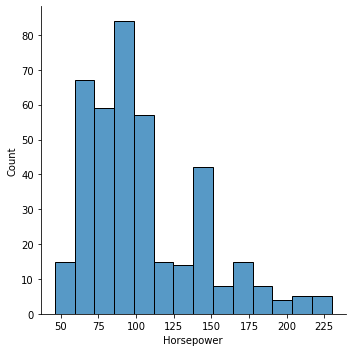

In [77]:
data["Horsepower"]=data["Horsepower"].fillna(data["Horsepower"].mean())
sns.displot(data.Horsepower)

<h3>EDA<h3>

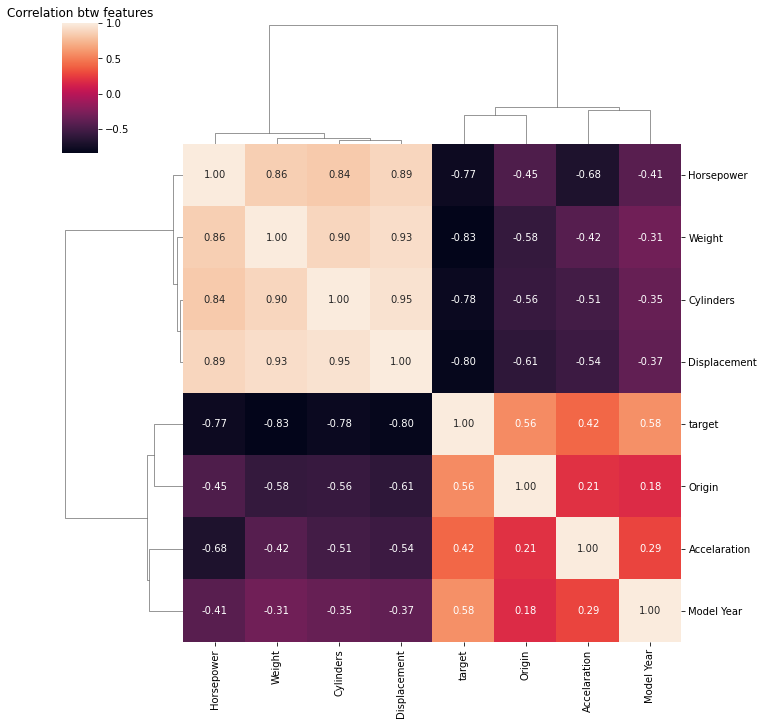

In [78]:
corr_matrix=data.corr()
sns.clustermap(corr_matrix,annot=True,fmt=".2f")
plt.title("Correlation btw features")
plt.show()

Text(0.5, 1.0, 'Correlation btw features')

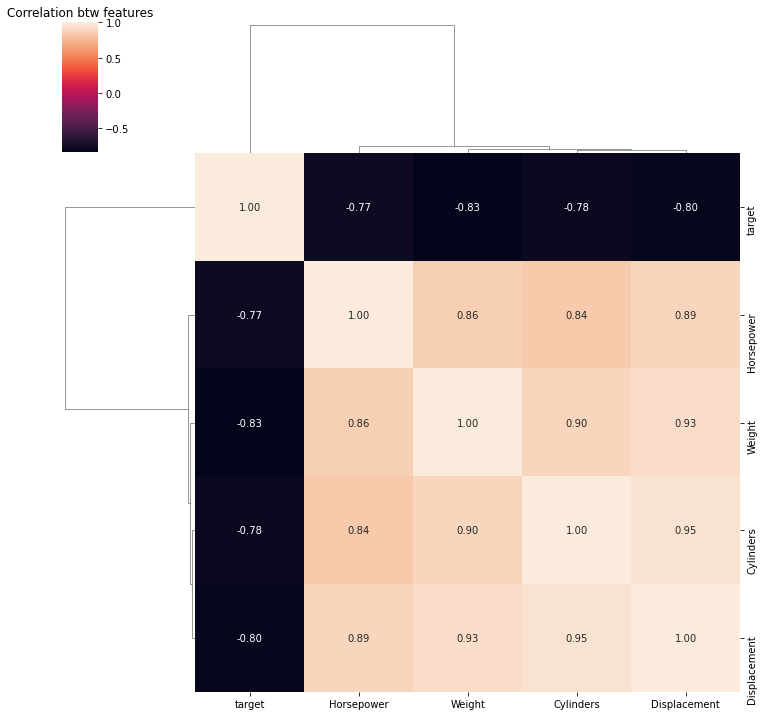

In [79]:
threshold=0.75
filtre=np.abs(corr_matrix["target"])>threshold
corr_features = corr_matrix.columns[filtre].tolist()
sns.clustermap(data[corr_features].corr(),annot=True,fmt=".2f")
plt.title("Correlation btw features")


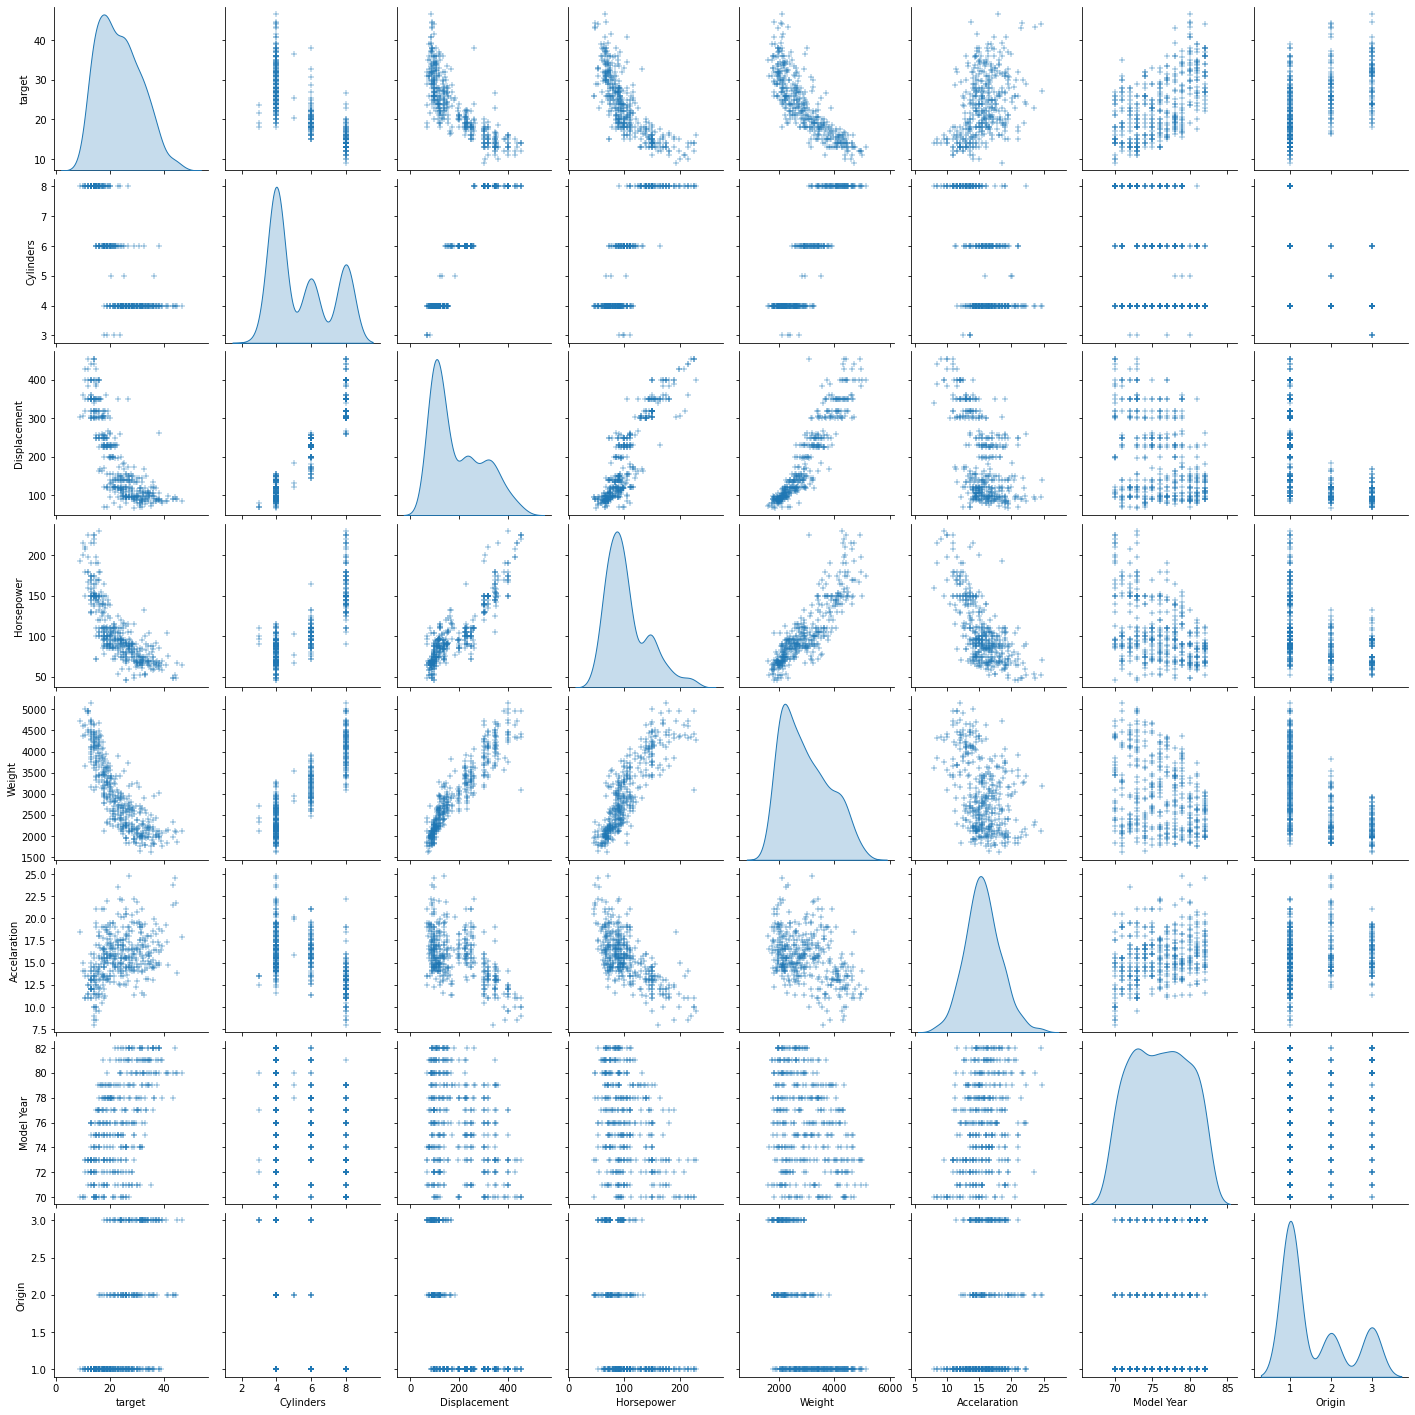

In [80]:
sns.pairplot(data,diag_kind="kde",markers ="+")

Cylinders and Origin can be categorical data

<AxesSubplot:xlabel='Origin', ylabel='count'>

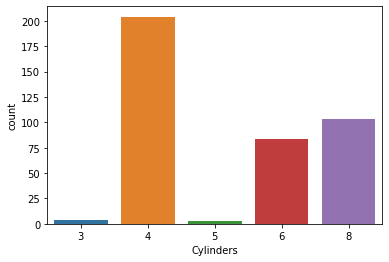

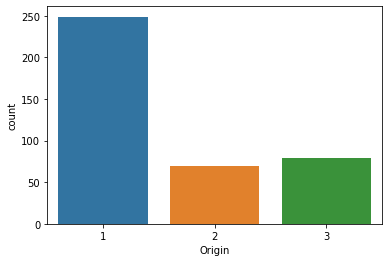

In [81]:
plt.figure()
sns.countplot(data["Cylinders"])

plt.figure()
sns.countplot(data["Origin"])


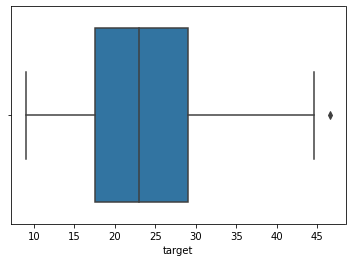

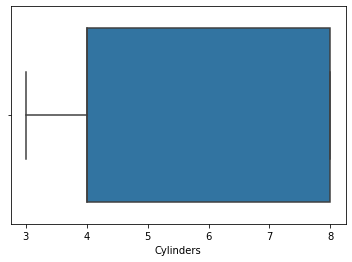

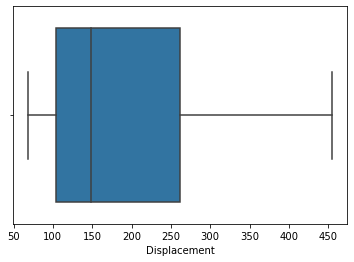

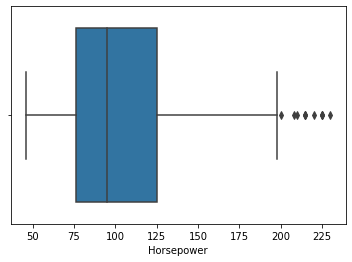

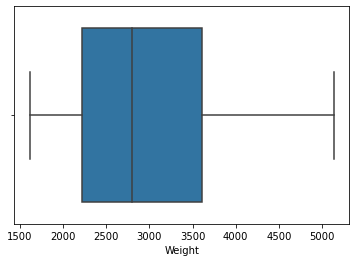

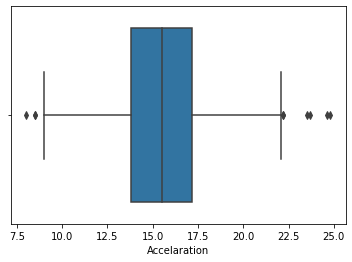

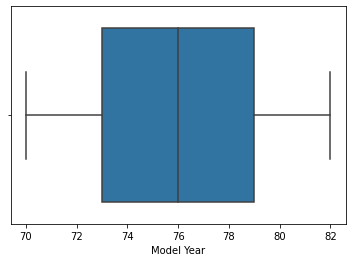

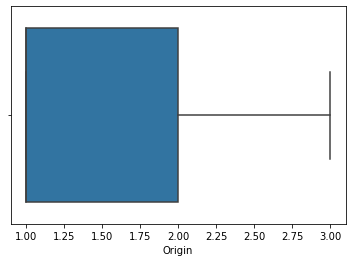

In [82]:
for c in data.columns:
    plt.figure()
    sns.boxplot(x=c,data=data,orient="v")

Outlier: horsepower and accelartion

In [83]:
thr = 2
horsepower_desc = describe["Horsepower"]
horsepower_desc

count    392.000000
mean     104.469388
std       38.491160
min       46.000000
25%       75.000000
50%       93.500000
75%      126.000000
max      230.000000
Name: Horsepower, dtype: float64

In [84]:
q3_hp=horsepower_desc[6]
q1_hp=horsepower_desc[4]
IQR_hp=q3_hp-q1_hp
top_limit_hp=q3_hp+thr*IQR_hp
bottom_limit_hp=q1_hp-thr*IQR_hp
filter_hp_bottom=bottom_limit_hp<data["Horsepower"]
filter_hp_top=data["Horsepower"]<top_limit_hp
filter_hp=filter_hp_bottom & filter_hp_top
data=data[filter_hp]


In [85]:
accelaration_desc = describe["Accelaration"]
accelaration_desc

q3_hp=accelaration_desc[6]
q1_hp=accelaration_desc[4]
IQR_hp=q3_hp-q1_hp
top_limit_hp=q3_hp+thr*IQR_hp
bottom_limit_hp=q1_hp-thr*IQR_hp
filter_hp_bottom=bottom_limit_hp<data["Accelaration"]
filter_hp_top=data["Accelaration"]<top_limit_hp
filter_hp=filter_hp_bottom & filter_hp_top
data=data[filter_hp]

In [86]:
data

,target,Cylinders,Displacement,Horsepower,Weight,Accelaration,Model Year,Origin
0,18.0,8,307.0,130.0,3504.0,12.0,70,1
1,15.0,8,350.0,165.0,3693.0,11.5,70,1
2,18.0,8,318.0,150.0,3436.0,11.0,70,1
3,16.0,8,304.0,150.0,3433.0,12.0,70,1
4,17.0,8,302.0,140.0,3449.0,10.5,70,1
...,...,...,...,...,...,...,...,...
392,27.0,4,151.0,90.0,2950.0,17.3,82,1
393,27.0,4,140.0,86.0,2790.0,15.6,82,1
395,32.0,4,135.0,84.0,2295.0,11.6,82,1
396,28.0,4,120.0,79.0,2625.0,18.6,82,1


<h3>Feature Engineering<h3>

<AxesSubplot:xlabel='target', ylabel='Density'>

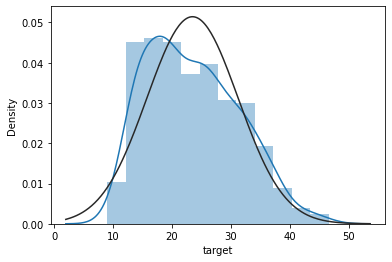

In [88]:
sns.distplot(data.target,fit=norm)

In [89]:
(mu,sigma) = norm.fit(data["target"])
print(mu,sigma)

23.472405063291134 7.756119546409932


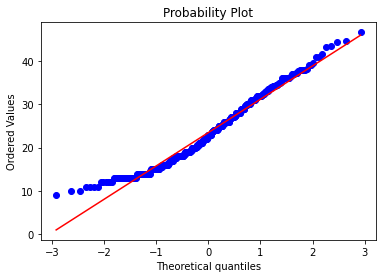

In [92]:
plt.figure()
stats.probplot(data["target"],plot=plt)
plt.show()

<AxesSubplot:xlabel='target', ylabel='Density'>

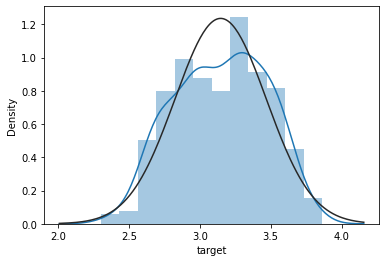

In [93]:
data["target"]=np.log1p(data["target"])
plt.figure()
sns.distplot(data.target,fit=norm)

In [94]:
(mu,sigma) = norm.fit(data["target"])
print(mu,sigma)

3.146474056830183 0.3227569103044823


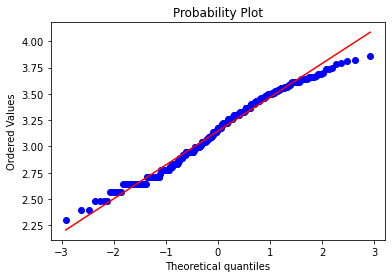

In [95]:
plt.figure()
stats.probplot(data["target"],plot=plt)
plt.show()

In [97]:
skewed_feats=data.apply(lambda x:skew(x.dropna())).sort_values(ascending=False)
skewness = pd.DataFrame(skewed_feats,columns=["skewed"])
skewness

,skewed
Horsepower,1.067743
Origin,0.923381
Displacement,0.714682
Weight,0.533226
Cylinders,0.523374
Accelaration,0.168986
Model Year,0.013098
target,-0.117687


<h3>One Hot Encoding<h3>

In [102]:
data["Cylinders"]=data["Cylinders"].astype(str)
data["Origin"]=data["Origin"].astype(str)
data =pd.get_dummies(data)

KeyError: 'Origin'

In [103]:
data

,target,Displacement,Horsepower,Weight,Accelaration,Model Year,Cylinders_3,Cylinders_4,Cylinders_5,Cylinders_6,Cylinders_8,Origin_1,Origin_2,Origin_3
0,2.944439,307.0,130.0,3504.0,12.0,70,0,0,0,0,1,1,0,0
1,2.772589,350.0,165.0,3693.0,11.5,70,0,0,0,0,1,1,0,0
2,2.944439,318.0,150.0,3436.0,11.0,70,0,0,0,0,1,1,0,0
3,2.833213,304.0,150.0,3433.0,12.0,70,0,0,0,0,1,1,0,0
4,2.890372,302.0,140.0,3449.0,10.5,70,0,0,0,0,1,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
392,3.332205,151.0,90.0,2950.0,17.3,82,0,1,0,0,0,1,0,0
393,3.332205,140.0,86.0,2790.0,15.6,82,0,1,0,0,0,1,0,0
395,3.496508,135.0,84.0,2295.0,11.6,82,0,1,0,0,0,1,0,0
396,3.367296,120.0,79.0,2625.0,18.6,82,0,1,0,0,0,1,0,0


<h3>Split-Standardization<h3>

In [106]:
x=data.drop(["target"],axis=1)
y=data.target

test_size=0.9
X_train,X_test,Y_train,Y_test=train_test_split(x,y,test_size=test_size,random_state=42)

In [108]:
scaler =StandardScaler()
X_train=scaler.fit_transform(X_train)
X_test=scaler.transform(X_test)

<h3>Regression Models<h3>

In [109]:
lr=LinearRegression()
lr.fit(X_train,Y_train)
print("LR Coef" ,lr.coef_)
y_predicted_dummy=lr.predict(X_test)
mse=mean_squared_error(Y_test,y_predicted_dummy)
print("linear Regression MSE:",mse)

LR Coef [-9.92705759e-02 -1.05006197e-01 -2.28689229e-02 -4.99057559e-02
  4.34952012e-02 -5.72828846e-02  4.72375426e-02  3.46944695e-17
 -1.40612813e-02 -2.28840651e-02 -7.11143569e-03 -2.73464310e-02
  3.45783731e-02]
linear Regression MSE: 0.020005683579745276


Ridge Coef: [-0.07849695 -0.09734007 -0.03799319 -0.04613241  0.04520109 -0.0535352
  0.05108925  0.         -0.01455674 -0.02919833 -0.00857541 -0.02556196
  0.03459116]
Ridge Best Estimator : Ridge(alpha=0.31622776601683794, max_iter=1000, random_state=42)
Ridge MSE  0.019397481240360257
-------------------------------------


Text(0.5, 1.0, 'Ridge')

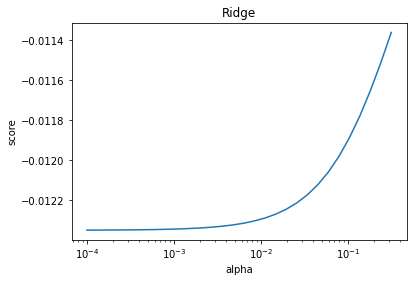

In [111]:
ridge=Ridge(random_state=42,max_iter=1000)

alphas=np.logspace(-4,-0.5,30)

tuned_parameters=[{'alpha':alphas}]
n_folds=5

clf=GridSearchCV(ridge,tuned_parameters,cv=n_folds,scoring="neg_mean_squared_error",refit=True)
clf.fit(X_train,Y_train)
scores=clf.cv_results_["mean_test_score"]
score_std=clf.cv_results_["std_test_score"]

print("Ridge Coef:",clf.best_estimator_.coef_)

ridge = clf.best_estimator_

print("Ridge Best Estimator :",ridge)

y_predicted_dummy=clf.predict(X_test)
mse=mean_squared_error(Y_test,y_predicted_dummy)
print("Ridge MSE ",mse)
print("-------------------------------------")

plt.figure()
plt.semilogx(alphas,scores)
plt.xlabel("alpha")
plt.ylabel("score")
plt.title("Ridge")

Lasso Coef: [-0.03758778 -0.08757891 -0.0646061  -0.02803523  0.0491826  -0.03359315
  0.071679    0.          0.         -0.01794883 -0.         -0.00408397
  0.04250482]
Lasso Best Estimator : Ridge(alpha=0.31622776601683794, max_iter=1000, random_state=42)
Lasso MSE  0.017598069416113086
-------------------------------------


Text(0.5, 1.0, 'Lasso')

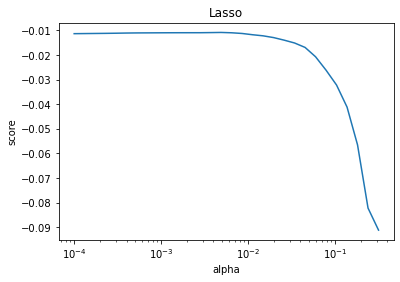

In [114]:
lasso=Lasso(random_state=42,max_iter=1000)

alphas=np.logspace(-4,-0.5,30)

tuned_parameters=[{'alpha':alphas}]
n_folds=5

clf=GridSearchCV(lasso,tuned_parameters,cv=n_folds,scoring="neg_mean_squared_error",refit=True)
clf.fit(X_train,Y_train)
scores=clf.cv_results_["mean_test_score"]
score_std=clf.cv_results_["std_test_score"]

print("Lasso Coef:",clf.best_estimator_.coef_)

lasso = clf.best_estimator_

print("Lasso Best Estimator :",ridge)

y_predicted_dummy=clf.predict(X_test)
mse=mean_squared_error(Y_test,y_predicted_dummy)
print("Lasso MSE ",mse)
print("-------------------------------------")

plt.figure()
plt.semilogx(alphas,scores)
plt.xlabel("alpha")
plt.ylabel("score")
plt.title("Lasso")

In [115]:
parametersGrid ={"alpha":alphas,
                "l1_ratio":np.arange(0.0,1.0,0.05)}
eNet=ElasticNet(random_state=42,max_iter=10000)
clf=GridSearchCV(eNet,parametersGrid,cv=n_folds,scoring='neg_mean_squared_error',refit=True)
clf.fit(X_train,Y_train)

print("ElasticNet Coef :",clf.best_estimator_.coef_)

eNet=clf.best_estimator_
print("ElasticNet Best Estimator :",eNet)

y_predicted_dummy=clf.predict(X_test)
mse=mean_squared_error(Y_test,y_predicted_dummy)
print("ElasticNet MSE:",mse)

ElasticNet Coef : [-0.04521908 -0.07808085 -0.06742275 -0.024673    0.04776549 -0.03439345
  0.06689553  0.         -0.         -0.01879676 -0.         -0.00575413
  0.03999268]
ElasticNet Best Estimator : ElasticNet(alpha=0.04520353656360245, l1_ratio=0.1, max_iter=10000,
           random_state=42)
ElasticNet MSE: 0.017792996858653383


In [116]:
parametersGrid = {'nthread':[4], #when use hyperthread, xgboost may become slower
              'objective':['reg:linear'],
              'learning_rate': [.03, 0.05, .07], 
              'max_depth': [5, 6, 7],
              'min_child_weight': [4],
              'silent': [1],
              'subsample': [0.7],
              'colsample_bytree': [0.7],
              'n_estimators': [500,1000]}

model_xgb = xgb.XGBRegressor()

clf = GridSearchCV(model_xgb, parametersGrid, cv = n_folds, scoring='neg_mean_squared_error', refit=True, n_jobs = 5, verbose=True)

clf.fit(X_train, Y_train)
model_xgb = clf.best_estimator_

y_predicted_dummy = clf.predict(X_test)
mse = mean_squared_error(Y_test,y_predicted_dummy)
print("XGBRegressor MSE: ",mse)

Fitting 5 folds for each of 18 candidates, totalling 90 fits
[22:03:02] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/objective/regression_obj.cu:171: reg:linear is now deprecated in favor of reg:squarederror.
[22:03:03] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:573: 
Parameters: { "silent" } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.


XGBRegressor MSE:  0.017372463641071326


In [117]:
class AveragingModels():
    def __init__(self, models):
        self.models = models
        
    
    def fit(self, X, y):
        self.models_ = [clone(x) for x in self.models]
        
        
        for model in self.models_:
            model.fit(X, y)

        return self
    
    def predict(self, X):
        predictions = np.column_stack([model.predict(X) for model in self.models_])
        return np.mean(predictions, axis=1)  


averaged_models = AveragingModels(models = (model_xgb, lasso))
averaged_models.fit(X_train, Y_train)

y_predicted_dummy = averaged_models.predict(X_test)
mse = mean_squared_error(Y_test,y_predicted_dummy)
print("Averaged Models MSE: ",mse)


[22:03:47] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/objective/regression_obj.cu:171: reg:linear is now deprecated in favor of reg:squarederror.
[22:03:47] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:573: 
Parameters: { "silent" } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.


Averaged Models MSE:  0.016162018950893264
